# PyTorch Quickstart & Review some basics of ML

Let's follow [QuickStart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) first.

## Exercise
### 1. How 'batch' work with each layers?
Let's check out how layers work with batch in pytorch. In this example, shape of a batch is (64, 1, 28, 28) where 64 is batch size. first linear layer takes only $28\times28$ elements in 'Creating Models' part.
```python
class NeuralNetwork(nn.Module):
    def __init__(self):
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.linear(28*28, 512),
            ...
        )
```
#### Flatten() layer
Corresponds to batch, output of Flatten method with default arguments is 2-D array (It does not flatten first dimension). Let's check out output of Flatten layer with different 'start_dim' argument...

In [5]:
class flatten_test(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten0 = nn.Flatten()
        self.flatten1 = nn.Flatten(start_dim=0)
        self.flatten2 = nn.Flatten(start_dim=1)
        
    def flatten_default(self, x):
        x = self.flatten0(x)
        return x
    
    def flatten_sd0(self, x):
        x = self.flatten1(x)
        return x
    
    def flatten_sd1(self, x):
        x = self.flatten2(x)
        return x
    
model_ = flatten_test().to(device)

for X, _ in test_dataloader:
    print(f"Shape of flatten0(X) :{model_.flatten_default(X).shape}")
    print(f"Shape of flatten1(X) :{model_.flatten_sd0(X).shape}")
    print(f"Shape of flatten2(X) :{model_.flatten_sd1(X).shape}")
    break

Shape of flatten0(X) :torch.Size([64, 784])
Shape of flatten1(X) :torch.Size([50176])
Shape of flatten2(X) :torch.Size([64, 784])


Or one can find same information on [Source Code](https://pytorch.org/docs/stable/_modules/torch/nn/modules/flatten.html#Flatten) or help(nn.Flatten).  
Like this, all the layers might assumes one additional dimension for batch. If one disbands, each output of an input does not depend on batch size.

#### Loss and Optimization
How about loss and optimization? Loss should return a continuous number that usually exhibits how prediction was far from label. Optimization updates parameters of model. While it updates model parameters, it cannot just iterate over batch size. Let's see some source codes someday or not...

### 2. How 'loss' and 'optimizer' work with parameters on model?
Loss and Optimizer does not take each other as argument. They take arguments from 'model' only.
```python
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
def train(dataloader, model, loss_fn, optimizer):
    ...
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        ...
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

How results of loss.backward passed to optimizer? Let's see source codes about this...
I've inserted 'help(loss.backward)' on above to verify where backward method came from. It belongs to 'torch._tensor'. zero_grad and step method of optimizer came from 'torch.optim.optimizer'. let's read documents or source code later or not...

In [18]:
help(loss_fn)
#help(nn.modules.loss)

Help on CrossEntropyLoss in module torch.nn.modules.loss object:

class CrossEntropyLoss(_WeightedLoss)
 |  CrossEntropyLoss(weight: Optional[torch.Tensor] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean', label_smoothing: float = 0.0) -> None
 |  
 |  This criterion computes the cross entropy loss between input logits
 |  and target.
 |  
 |  It is useful when training a classification problem with `C` classes.
 |  If provided, the optional argument :attr:`weight` should be a 1D `Tensor`
 |  assigning weight to each of the classes.
 |  This is particularly useful when you have an unbalanced training set.
 |  
 |  The `input` is expected to contain the unnormalized logits for each class (which do `not` need
 |  to be positive or sum to 1, in general).
 |  `input` has to be a Tensor of size :math:`(C)` for unbatched input,
 |  :math:`(minibatch, C)` or :math:`(minibatch, C, d_1, d_2, ..., d_K)` with :math:`K \geq 1` for the
 |  `K`-dimensional ca

## Reproduce
Just run all the codes on tutorial. (just same codes with the tutorial)

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [5]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [24]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [25]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [9]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [10]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [11]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


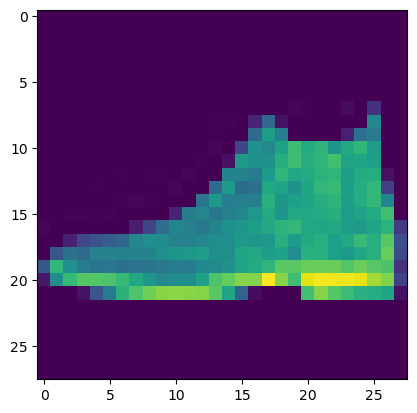

In [13]:
import matplotlib.pyplot as plt
input = test_data[0][0][0]
#plt.imshow(input.to('cpu').numpy())
plt.imshow(input.numpy())
plt.show()

In [14]:
print(test_data[0][0][0].shape)

torch.Size([28, 28])
